# Titanic Dataset

Two main themes:
1. Who were the passengers?
2. What helped them to survive?

In [1]:
# "Default" Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Investigate Data

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# who were the passengers

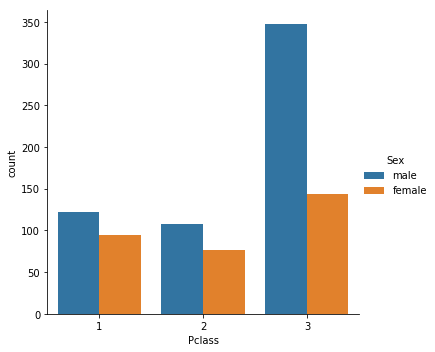

In [6]:
# breakdown of passenger by sex and class
sns.catplot('Pclass', data=df, kind='count', hue='Sex')

In [7]:
def classify_passenger_as_male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child_' + sex
    
    return sex

In [8]:
df['person'] = df[['Age', 'Sex']].apply(classify_passenger_as_male_female_child, axis=1)

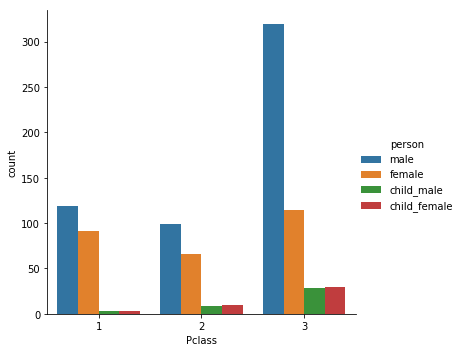

In [9]:
sns.catplot('Pclass', data=df, kind='count', hue='person')

Looks like there were way more children in 3rd class!

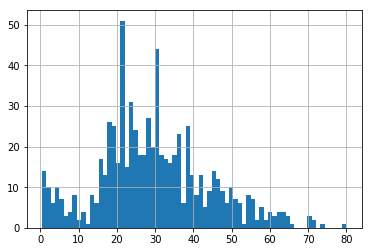

In [10]:
df['Age'].hist(bins=70)

In [11]:
df['Age'].mean() # What was the mean age of the passenger?

29.69911764705882

In [12]:
df['person'].value_counts() # How many passengers of each type?

male            537
female          271
child_female     43
child_male       40
Name: person, dtype: int64

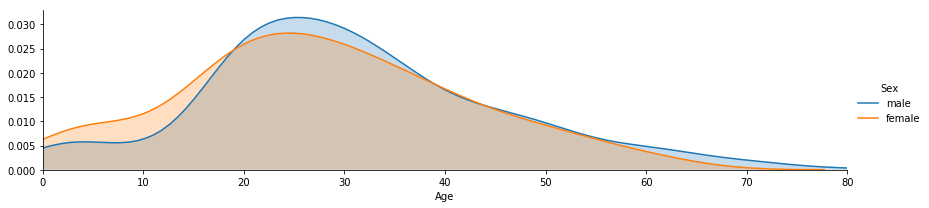

In [13]:
fig = sns.FacetGrid(df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

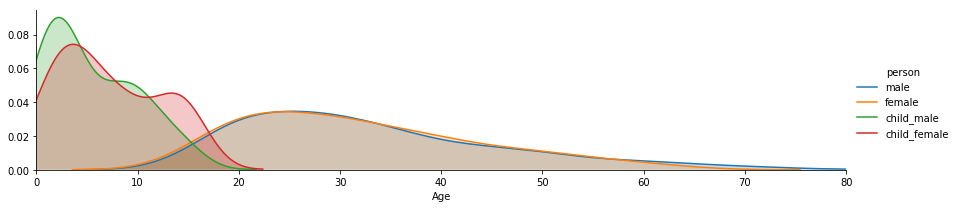

In [14]:
fig = sns.FacetGrid(df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

Now, let's examine how many passengers of each class were there

In [15]:
deck = df['Cabin'].dropna()

In [16]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [17]:
levels = []
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

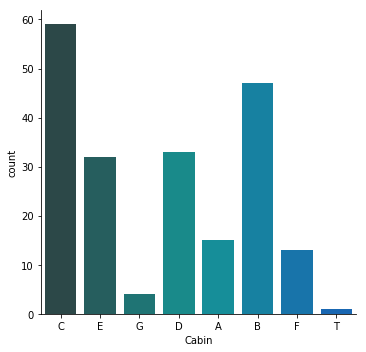

In [18]:
sns.catplot('Cabin', data=cabin_df, kind='count', palette='winter_d')

In [19]:
# looks like there is a redundant T cabin
cabin_df = cabin_df[cabin_df.Cabin != 'T']

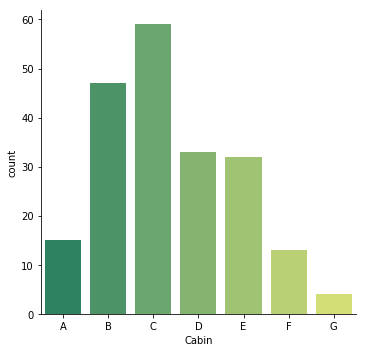

In [20]:
sns.catplot('Cabin', data=cabin_df, kind='count', palette='summer', order=sorted(cabin_df['Cabin'].unique()))

Where did passengers come from?

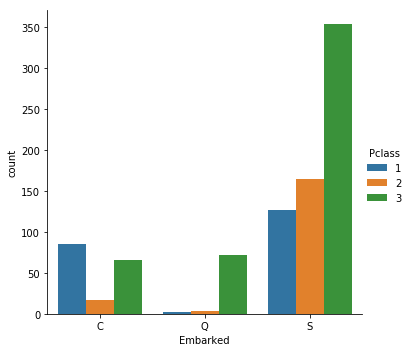

In [21]:
sns.catplot(kind='count', x='Embarked', data=df, hue='Pclass', order=['C', 'Q', 'S'])

Interesting fact that Queenstown passengers were mostly 3rd class. Now let's see who was alone and who was with family.

In [22]:
df['Alone'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [23]:
df['Alone'].loc[df['Alone'] > 0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Alone'

C:\Sources\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


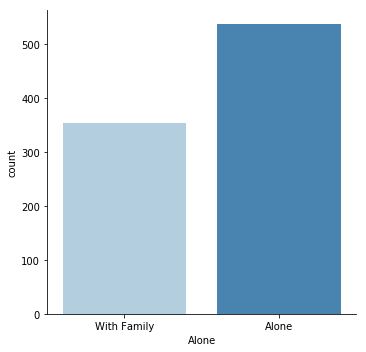

In [24]:
sns.catplot(kind='count', x='Alone', data=df, palette='Blues')

Mostly people were travelling alone. So now we can move ahead to figure out the 2nd theme.

## Survival Factors

In [25]:
df['Survivor'] = df['Survived'].map({0: 'no', 1: 'yes'})

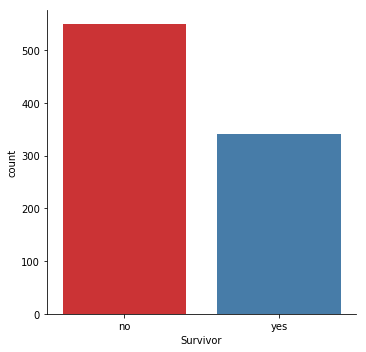

In [26]:
sns.catplot(kind='count', x='Survivor', data=df, palette='Set1')

C:\Sources\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


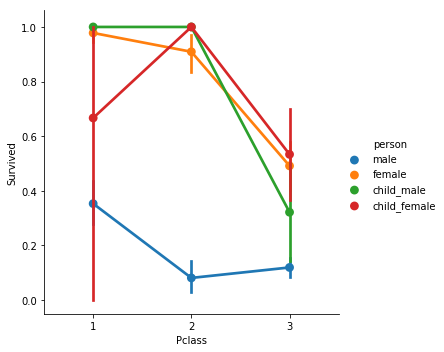

In [27]:
#sns.catplot('Pclass', 'Survivor', data=df)
sns.factorplot(x='Pclass', y='Survived', data=df, hue='person')

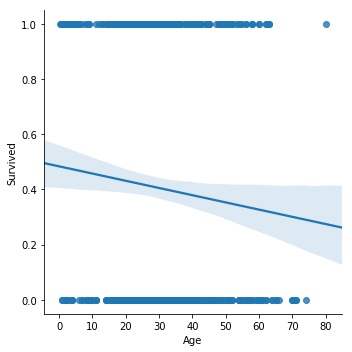

In [28]:
sns.lmplot('Age', 'Survived', data=df)

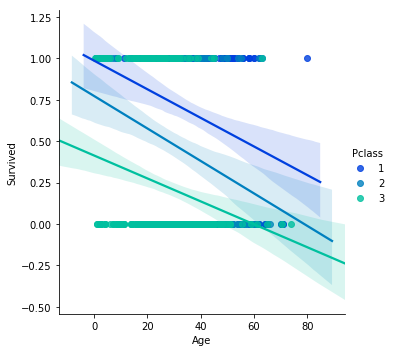

In [29]:
sns.lmplot('Age', 'Survived', data=df, hue='Pclass', palette='winter')

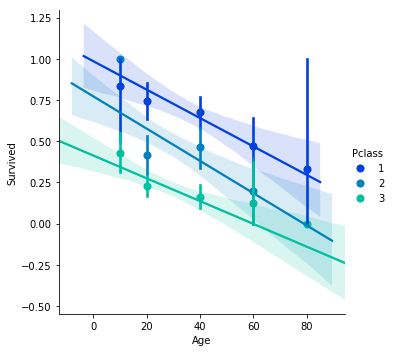

In [30]:
generations = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue='Pclass', data=df, x_bins = generations, palette = 'winter')

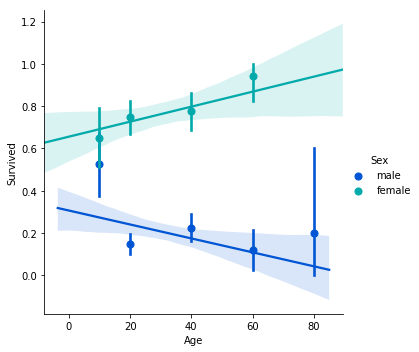

In [31]:
sns.lmplot('Age', 'Survived', hue='Sex', data=df, x_bins = generations, palette = 'winter')

In [32]:
ds_df = df[['Cabin', 'Alone', 'Survivor']].dropna()

temp_data = []
for index, row in ds_df.iterrows():
    cabin_code = row[0][0]    
    if (cabin_code != 'T'):
        temp_data.append([cabin_code, row[1], row[2]])
        
ds_df = DataFrame(temp_data)
ds_df.columns = ['Cabin', 'Alone', 'Survivor']

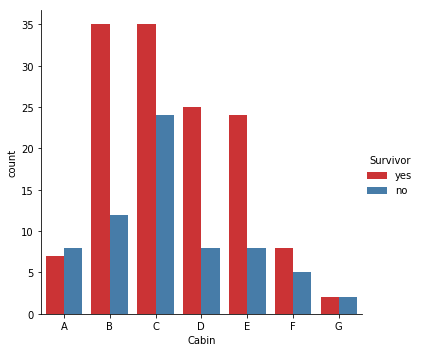

In [33]:
sns.catplot('Cabin', data=ds_df, hue='Survivor', kind='count', palette='Set1', order=sorted(cabin_df['Cabin'].unique()))

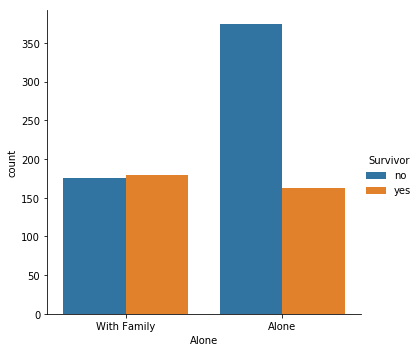

In [34]:
sns.catplot('Alone', data=df, hue='Survivor', kind='count')